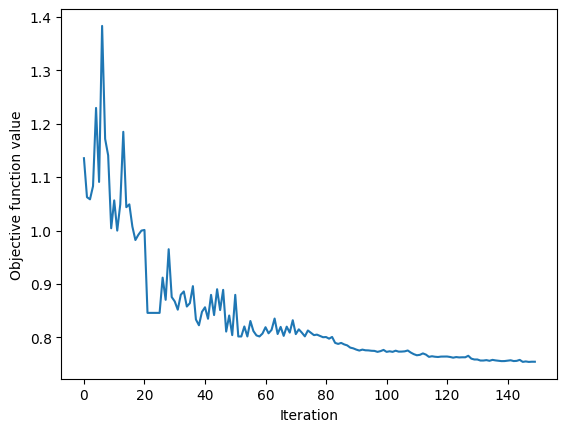

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93        89
         1.0       0.99      0.87      0.92        98

    accuracy                           0.93       187
   macro avg       0.93      0.93      0.93       187
weighted avg       0.93      0.93      0.93       187

[[88  1]
 [13 85]] = confusion matrix for train set 

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94        45
         1.0       1.00      0.83      0.91        36

    accuracy                           0.93        81
   macro avg       0.94      0.92      0.92        81
weighted avg       0.93      0.93      0.92        81

[[45  0]
 [ 6 30]] = confusion matrix for test set 
 
0.92 = roc_auc_score for test set 



In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time, copy, warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

data = pd.read_csv('creditcard.csv')
histogram = data.hist(bins=20)


normal = data[data.Class==0]
fraud = data[data.Class==1]

num_normal = normal.shape[0]
num_fraud = fraud.shape[0]

print(f"Number of normal examples = {num_normal}")
print(f"Number of fraud examples = {num_fraud}\n")

ratio = num_normal / num_fraud
print(f'normal to fraud ratio in the whole data = {round(ratio,2)}')

normal_fraud_ratio = 1  # balance the dataset
normal_sample = normal.sample(normal_fraud_ratio * num_fraud)
sample = pd.concat([fraud, normal_sample], axis=0)


for i in range(100):
    sample = np.random.permutation(sample)

X, y = sample[:, :-1], sample[:, -1]

# Scale the features to [0,1]
X = MinMaxScaler().fit_transform(X)

num_examples, num_features = X.shape
print("number of examples = ", num_examples)
print("number of features = ", num_features)

# Zero padding to make number of features a power of 2
n = int(np.ceil(np.log2(num_features)))
dim = 2**n
print(f'(number of qubits, dimension of the Hilbert space) = {(n, dim)}')

zeros = np.zeros((num_examples, dim - num_features))
X = np.append(X, zeros, axis=1)

num_examples, num_features = X.shape
print("number of examples = ", num_examples)
print("number of features = ", num_features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape)

# Importing the updated qiskit components
from qiskit_machine_learning.circuit.library import RawFeatureVector
from qiskit.circuit.library import RealAmplitudes

# Define feature map
fm = RawFeatureVector(feature_dimension=num_features)
fm.draw()

# Parametrized quantum circuit for classification
pqc = RealAmplitudes(num_qubits=n, reps=4)  # Increase reps for more parameters
pqc.decompose().draw()

# Define the optimizer and estimator
from qiskit_algorithms.optimizers import COBYLA  # Updated path for optimizers
from qiskit.primitives import Sampler  # Replacing Estimator with Sampler in VQC

optimizer = COBYLA(maxiter=150)
sampler = Sampler()  # Replacing the Estimator

# Callback function to plot objective function values during optimization
from IPython.display import clear_output

objective_func_vals = []
def callback(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

# Use VQC (Variational Quantum Classifier)
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=fm,
    ansatz=pqc,
    optimizer=optimizer,
    callback=callback
)

# Training the VQC model
%time
vqc.fit(X_train, y_train)

# Predicti
y_train_pred = vqc.predict(X_train)
y_test_pred = vqc.predict(X_test)


print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred), "= confusion matrix for train set \n")

print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred), "= confusion matrix for test set \n ")
print(round(roc_auc_score(y_test, y_test_pred), 2), "= roc_auc_score for test set \n")

In [9]:
warnings.filterwarnings('ignore')

def train_test(ML_model):
    print(20*' ', ML_model,'\n')
    ML_model.fit(X_train, y_train)                          # fit model

    y_train_pred = ML_model.predict(X_train)       # predict with the trained model
    y_test_pred = ML_model.predict(X_test)


    print(classification_report(y_train, y_train_pred))     # evaluate model performance
    print(confusion_matrix(y_train, y_train_pred), "= confusion matrix for train set \n")

    print(classification_report(y_test, y_test_pred))
    print(confusion_matrix(y_test, y_test_pred), "= confusion matrix for test set \n")
    print(round(roc_auc_score(y_test, y_test_pred),2), "= roc_auc_score for test set \n")

    print(70*'=')


#----------------------------------------------------------------------------------

print(70*'=')
ML_model = linear_model.LogisticRegression()            # create model instance
train_test(ML_model)


ML_model = MLPClassifier()
train_test(ML_model)


ML_model = svm.SVC()
train_test(ML_model)


ML_model = RandomForestClassifier()
train_test(ML_model)

                     LogisticRegression() 

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        89
         1.0       1.00      0.93      0.96        98

    accuracy                           0.96       187
   macro avg       0.96      0.96      0.96       187
weighted avg       0.97      0.96      0.96       187

[[89  0]
 [ 7 91]] = confusion matrix for train set 

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        45
         1.0       1.00      0.89      0.94        36

    accuracy                           0.95        81
   macro avg       0.96      0.94      0.95        81
weighted avg       0.95      0.95      0.95        81

[[45  0]
 [ 4 32]] = confusion matrix for test set 

0.94 = roc_auc_score for test set 

                     MLPClassifier() 

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        89
         1.